# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 7 Exercise </center>

# <center>DBSCAN Clustering</center>


# Part A: Differentiate DBSCAN from KMean using any iris dataset

# Import Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# 1. Data Manipulation with pandas

In [44]:
#load dataset here
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [45]:
df= pd.DataFrame(iris.data, columns =iris.feature_names)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

# 2. Data Exploration and Visualization

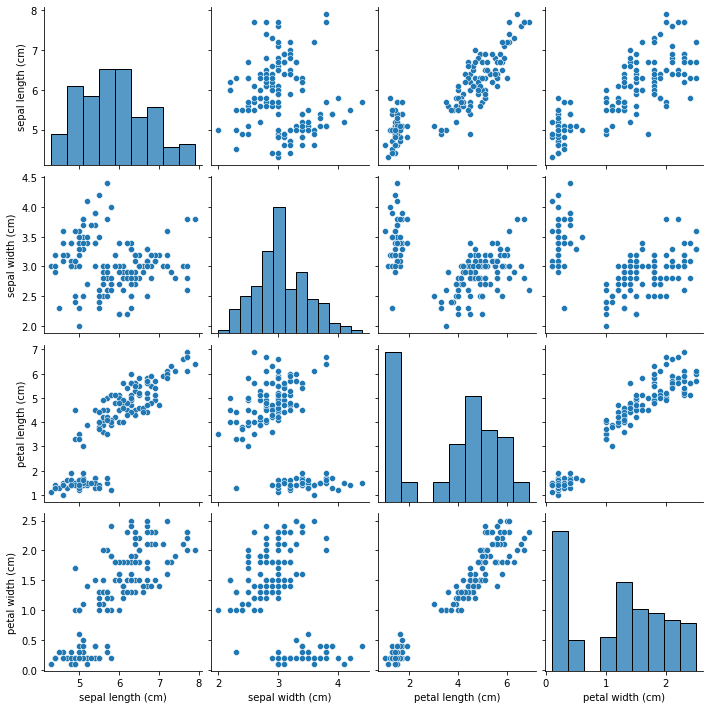

In [46]:
sns.pairplot(df)
plt.show()




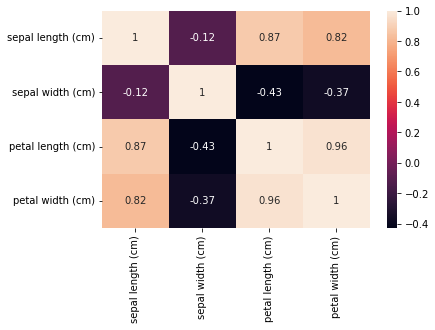

In [47]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# 3. Training Model

## 3.1. KMean Clustering

In [48]:
#create kmean model(assuming two clusters) here and explore outputs 
from sklearn.cluster import KMeans
X=df[['petal length (cm)', 'petal width (cm)']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans

KMeans(n_clusters=2, random_state=0)

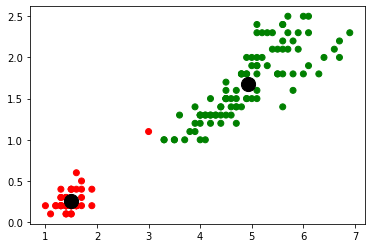

In [49]:
#plot clusters formed by Kmean
colormap = np.array(['r', 'g', 'b'])
categories = kmeans.predict(X)
X = df[['petal length (cm)', 'petal width (cm)']]
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[categories])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);



## 3.2. DBSCAN Clustering

In [50]:
#create DBSCAN model here and compare output with KMean
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.5)
db.fit(X)



DBSCAN()

In [52]:
y_pred = db.fit_predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

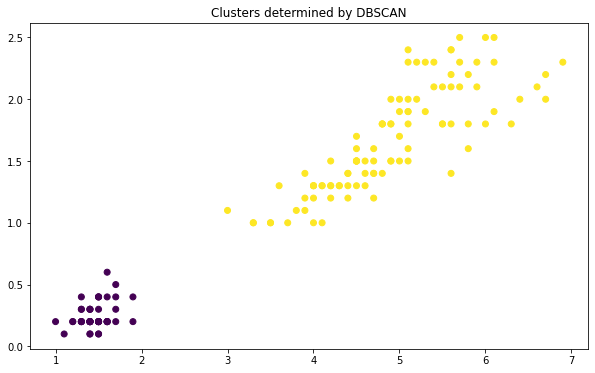

In [53]:
#Plot clusters formed by DBSCAN
plt.figure(figsize=(10,6))
plt.scatter(X['petal length (cm)'], X['petal width (cm)'],c=y_pred)
plt.title("Clusters determined by DBSCAN")
plt.show()



# Part B: Differentiate DBSCAN from KMean on moon shaped dataset

`sklearn.datasets.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)`

#### - Generate moon-shaped dataset using make_moons() function. Plot clusters to compare clusters formed by Kmean and DBSCAN algorithm.


#### - Change eps value and min_sample value to explore their effect on the learning algorithm.





In [55]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1, random_state=0)

In [56]:
df1=pd.DataFrame(X,y)
df1=df1.rename(columns={0: "X1", 1:"X2"})
df1.head()

X1        X2
0 -0.096023  0.995379
1  1.672301 -0.240278
0  0.991790  0.127877
1  0.050944  0.184892
1  1.032052 -0.499486

In [65]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

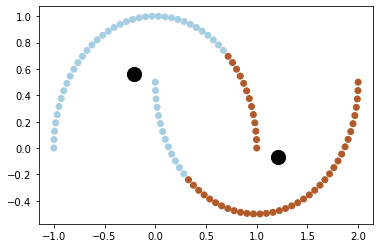

In [67]:
y_pred = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);


Text(0, 0.5, '$x_2$')

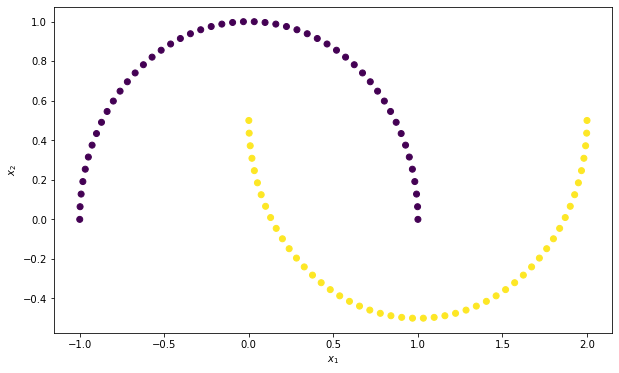

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [38]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

DBSCAN()

Text(0, 0.5, '$x_2$')

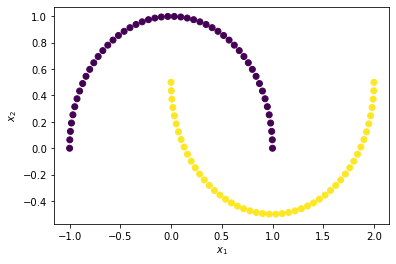

In [39]:
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster1.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [40]:
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 2


In [58]:
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 0


In [60]:
from sklearn.metrics import v_measure_score
print('v_measure =', v_measure_score(y, labels))

v_measure = 1.0


In [69]:
dbscan_cluster1 = DBSCAN(eps=0.5, min_samples=3)
dbscan_cluster1.fit(X)

DBSCAN(min_samples=3)

Text(0, 0.5, '$x_2$')

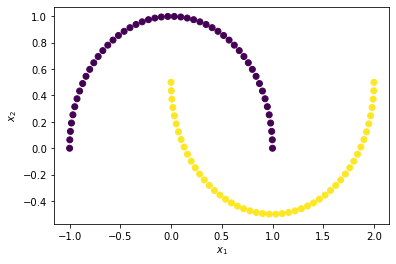

In [70]:
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster1.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Estimated no. of clusters: 2
Estimated no. of noise points: 0
v_measure = 1.0


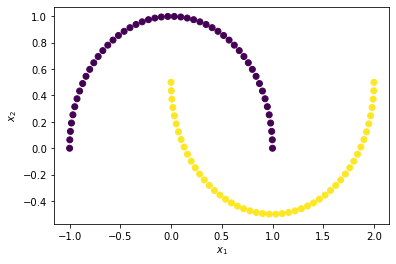

In [71]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=6)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))